<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plotting-expected-curves" data-toc-modified-id="Plotting-expected-curves-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting expected curves</a></span></li><li><span><a href="#Calculate-the-expected-values-of-the-amplitude-ratio-and-phase-difference-at-each-frequency" data-toc-modified-id="Calculate-the-expected-values-of-the-amplitude-ratio-and-phase-difference-at-each-frequency-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calculate the expected values of the amplitude ratio and phase difference at each frequency</a></span></li><li><span><a href="#Aaron's-Values" data-toc-modified-id="Aaron's-Values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Aaron's Values</a></span></li><li><span><a href="#Overall-Plots" data-toc-modified-id="Overall-Plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Overall Plots</a></span></li></ul></div>

In [904]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

plt.rcParams['figure.figsize'] = [16,5]
plt.rcParams.update({'font.size':22})

import seaborn as sns
sns.set()
sns.set(rc={'figure.figsize':(6,4), "lines.linewidth": 4}, font_scale=1.5)
sns.set_style('whitegrid', {'font.family':'helvetica', 'font.serif':'Times New Roman', 'grid.linestyle': '--'})
sns.set_palette("PuOr", 6)

## Plotting expected curves

In [905]:
# Constants
sigma_Al = 3.77e5;
R1_Al    = 22.25/2/1000; 
R2_Al    = 25.40/2/1000; 

sigma_Cu = 5.95e5; 
R1_Cu    = 25.44/2/1000; 
R2_Cu    = 28.62/2/1000; 
mu       = np.pi*4e-5;

In [906]:
# Anonymous functions
k0     = lambda f, sigma:  np.sqrt(2*np.pi*sigma*mu*0.5*f)
amp_r  = lambda k0, R1, R2: 2*np.sqrt(R2/R1)*np.exp(-(R2-R1)*k0)/np.sqrt(1+R1*k0+0.5*(R1*k0)**2)
p_diff = lambda k0, R1, R2: (R2-R1)*k0+np.arctan(R1*k0/(2+R1*k0))

In [907]:
f = np.linspace(100,80000,80000);

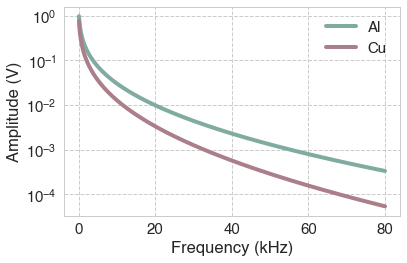

In [908]:
plt.plot(f/1000, amp_r(k0(f, sigma_Al), R1_Al, R2_Al), '#7FABA1', label="Al")
plt.plot(f/1000, amp_r(k0(f, sigma_Cu), R1_Cu, R2_Cu), '#AB7F89', label="Cu")
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (V)')
plt.yscale('log')
plt.tight_layout()
plt.savefig('expected_amp.png', dpi=800)

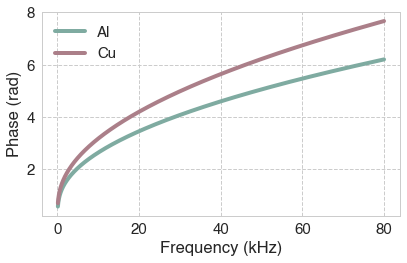

In [909]:
plt.plot(f/1000, p_diff(k0(f, sigma_Al), R1_Al, R2_Al), '#7FABA1', label="Al")
plt.plot(f/1000, p_diff(k0(f, sigma_Cu), R1_Cu, R2_Cu), '#AB7F89', label="Cu")
plt.legend()
plt.xlabel('Frequency (kHz)')
plt.ylabel('Phase (rad)')
plt.tight_layout()
plt.savefig('expected.png', dpi=800)

## Calculate the expected values of the amplitude ratio and phase difference at each frequency
and compare them to their measured values.

In [910]:
class Analysis:
    
    def __init__(self, filename, ind):
        
        with open(filename, 'r') as f:
            i=2
            data = f.readlines()
            print(data[0])
            data = data[1:]
            self.data = np.array([np.array([float(n) for n in line.replace('\n','').split('\t')]) for line in data])
            self.freq = self.data[i:,0]
            self.amp  = self.data[i:,2]
            self.phase = self.data[i:,3] + np.array((ind-1-i)*[0]+(len(self.freq)-ind+1+i)*[2*np.pi])
            
    def plot_phase(self, label='Measured', c=None):
        if c:
            plt.plot(self.freq/1000, self.phase, c, label=label)
        else: 
            #plt.scatter(self.freq/1000, self.phase, label='Data', s=1)
            plt.plot(self.freq/1000, self.phase, label=label)
        plt.xlabel('Frequency (kHz)')
        plt.ylabel('Phase (Rad)')
        
    def plot_amp(self, label='Measured', c=None):
        if c:
            plt.plot(self.freq/1000, self.amp, c, label=label)
        else:
            plt.plot(self.freq/1000, self.amp, label=label)
        plt.xlabel('Frequency (kHz)')
        plt.ylabel('Amplitude (V)')


In [911]:
# Analysis for al
air_file = "air-20200310.DAT"
air = Analysis(air_file, ind=82)
#air.plot_phase()
#air.plot_amp()

Freq. (Hz)	Offset (V)	Ampl. (V)	Phase (Rad)



Freq. (Hz)	Offset (V)	Ampl. (V)	Phase (Rad)

5.86320465519 593434.343434


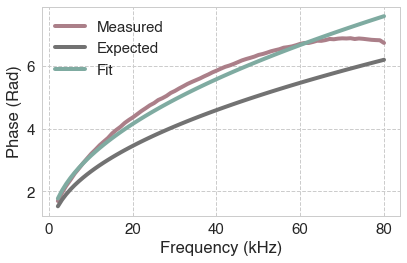

In [912]:
# Analysis for Alumninum
al_file = "al-20200310.DAT"
al = Analysis(al_file, ind=12-1)

# Fit phase
min_e = 100000
min_sig = 3e5
for sigma in np.linspace(5.5e5, 6.5e5, 100):
    fit = p_diff(k0(al.freq, sigma), R1_Al, R2_Al)
    error = np.sum(np.square(fit-al.phase))
    if error < min_e:
        min_e = error
        min_sig = sigma
print(min_e, min_sig)
plt.figure()
al.plot_phase(c='#AB7F89')
plt.plot(al.freq/1000, p_diff(k0(al.freq, sigma_Al), R1_Al, R2_Al), '#727272', label="Expected")
plt.plot(al.freq/1000, p_diff(k0(al.freq, min_sig), R1_Al, R2_Al), '#7FABA1', label="Fit")
plt.legend()
plt.tight_layout()
plt.savefig('al.png', dpi=800)
plt.show()

## Aaron's Values

1.000E+3	-6.340E-4	1.596E-1	1.410E+0

22.6817860623 556565.656566


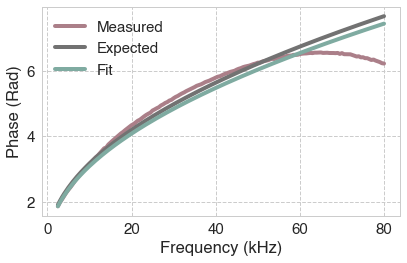

In [913]:
# Analysis for cu
cu_file = "25-02-2020-Cu-2Vpp.DAT"
cu = Analysis(cu_file, ind=19-1)

# Fit phase
min_e = 100000
min_sig = 3e5
for sigma in np.linspace(4e5, 9e5, 100):
    fit = p_diff(k0(cu.freq, sigma), R1_Al, R2_Al)
    error = np.sum(np.square(fit-cu.phase))
    if error < min_e:
        min_e = error
        min_sig = sigma
print(min_e, min_sig)
plt.figure()
cu.plot_phase(c='#AB7F89')
plt.plot(cu.freq/1000, p_diff(k0(cu.freq, sigma_Cu), R1_Cu, R2_Cu), '#727272', label="Expected")
plt.plot(cu.freq/1000, p_diff(k0(cu.freq, min_sig), R1_Cu, R2_Cu), '#7FABA1', label="Fit")
plt.legend()
plt.tight_layout()
plt.savefig('cu.png', dpi=800)
plt.show()

## Overall Plots

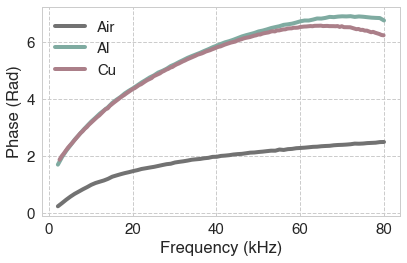

In [914]:
air.plot_phase(label='Air', c='#727272')
al.plot_phase(label='Al', c='#7FABA1')
cu.plot_phase(label='Cu', c='#AB7F89')

plt.legend()
plt.tight_layout()
plt.savefig('data.png', dpi=800)

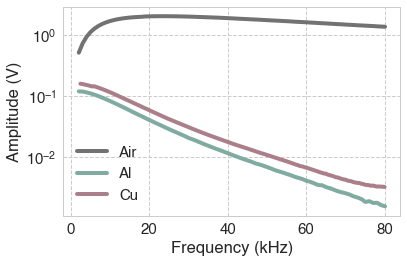

In [915]:
air.plot_amp(label='Air', c='#727272')
al.plot_amp(label='Al', c='#7FABA1')
cu.plot_amp(label='Cu', c='#AB7F89')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('data_amp.png', dpi=800)